In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import psycopg2
import getpass

In [3]:
%matplotlib inline
plt.style.use('ggplot') 

In [4]:
# Create a database connection
user = 'postgres'
password = 'master'
host = 'localhost'
dbname = 'mimic'
schema = 'mimiciii'

In [5]:
# Connect to the database
con = psycopg2.connect(dbname=dbname, user=user, host=host, 
                       password=password)

In [6]:
# Get length of stay from the icustays table
query = \
"""
select first_careunit, count(distinct(charttime)) as lab_time_count, count(distinct(l.subject_id)) as subject_count
    from mimiciii.labevents l inner join
    mimiciii.icustays i on
    i.subject_id=l.subject_id
    group by first_careunit
    order by lab_time_count desc
    limit 20
"""

data = pd.read_sql_query(query,con)

In [7]:
# Display the first few rows of the data
data.head(150)

,first_careunit,lab_time_count,subject_count
0,MICU,981181,15613
1,SICU,526733,7683
2,CSRU,502685,8421
3,CCU,438301,6798
4,TSICU,326725,6020
5,NICU,66035,7651


In [8]:
#data['lab_time_count'].quantile([.1, .25, .5, .75, .9])

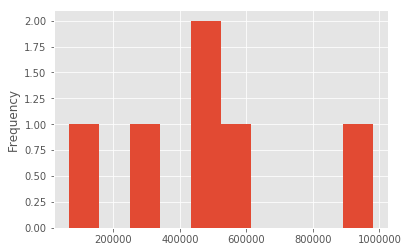

In [9]:
data.lab_time_count.plot(kind='hist')

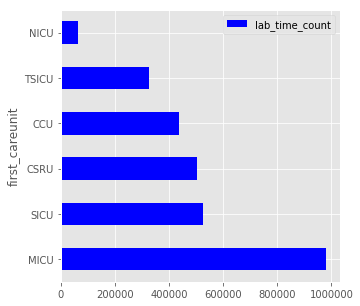

In [10]:
diagnoses = data.set_index('first_careunit').plot.barh(y='lab_time_count', figsize=(5, 5), color='blue')

In [11]:
data['avg_lab_time_count'] = data['lab_time_count'] / data['subject_count']
data.head(100)

,first_careunit,lab_time_count,subject_count,avg_lab_time_count
0,MICU,981181,15613,62.843848
1,SICU,526733,7683,68.558245
2,CSRU,502685,8421,59.694217
3,CCU,438301,6798,64.474993
4,TSICU,326725,6020,54.273256
5,NICU,66035,7651,8.630898


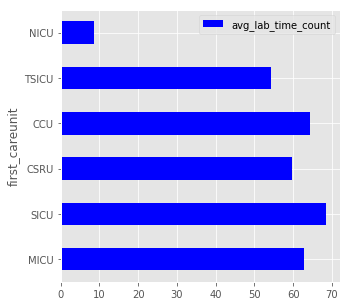

In [12]:
diagnoses = data.set_index('first_careunit').plot.barh(y='avg_lab_time_count', figsize=(5, 5), color='blue')

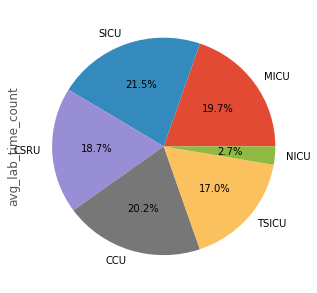

In [13]:
plot = data.plot.pie(y='avg_lab_time_count', figsize=(5, 5), legend=False, labels=data.first_careunit, autopct='%1.1f%%')

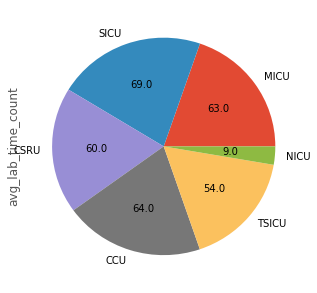

In [14]:
sizes = np.array(data.avg_lab_time_count)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

plot = data.plot.pie(y='avg_lab_time_count', figsize=(5, 5), legend=False, labels=data.first_careunit, autopct=absolute_value)